In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# The path should start with '/content/drive' after mounting
os.chdir('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


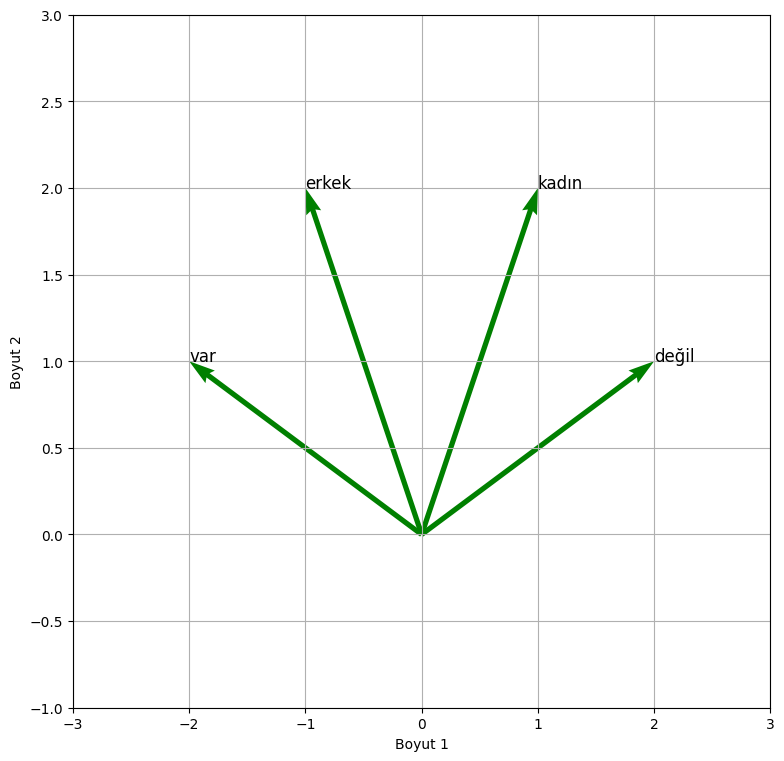

In [10]:
import matplotlib.pyplot as plt

# Örnek kelimeler ve vektör temsilleri
kelimeler = ['var', 'erkek', 'kadın', 'değil']
vektorler = [[-2, 1], [-1, 2], [1, 2], [2, 1]]

# Kelimeleri görselleştirme
plt.figure(figsize=(9, 9))
for kelime, vektor in zip(kelimeler, vektorler):
    plt.quiver(0, 0, vektor[0], vektor[1], angles='xy', scale_units='xy', scale=1, color='g')
    plt.text(vektor[0], vektor[1], kelime, fontsize=12)

plt.xlim(-3, 3)
plt.ylim(-1, 3)
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.grid(True)
plt.show()

In [11]:
from gensim.models import Word2Vec

# Örnek metin verisi
metin = "kuşlar uçar balıklar yüzer kedi miyavlar köpek havlar"

# Metni parçalara ayırma
cumleler = metin.split()

# Word2Vec modelini eğitme
model = Word2Vec([cumleler], vector_size=2, window=2, min_count=1, workers=4)

# Analoji oyunu
analoji_sonuc = model.wv.most_similar(positive=['balıklar', 'uçar'], negative=['kuşlar'])

print("Analoji Sonucu:", analoji_sonuc)

Analoji Sonucu: [('kedi', 0.9482049942016602), ('köpek', 0.9082263112068176), ('havlar', -0.5071588754653931), ('miyavlar', -0.9995678663253784), ('yüzer', -0.9997981190681458)]


In [12]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

# Örnek metin verisi
metin = "Bu bir örnek cümle. Başka bir örnek cümle de ekleyebilirsiniz."

# Metni cümlelere ayırma
cumleler = nltk.sent_tokenize(metin)

# Word2Vec modelini eğitme
model = Word2Vec([nltk.word_tokenize(cumle) for cumle in cumleler], vector_size=50, window=3, min_count=1, workers=4)

# Modeli kaydetme
model.save("kendi_word_embedding_modeliniz.model")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
import nltk
nltk.download('punkt', download_dir='/path/to/nltk_data')

[nltk_data] Downloading package punkt to /path/to/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Örnek bir cümle
cumle = "Biz Fırat Üniversitesinde yüksek lisans yapmaktayız, genelde her ders'te ödev verilerbilir, ödev öğrenciye göre zor yada kolaydır, ayrıca fırat yazılım müh bölümü daha arlıklı olarak uygulamayı dayalı olduğundan dolayı, 1. 2. 3. ve 4. ayrıca yüksek lisans'ta ödev verilmektedir. Ben kendim olarak bu şekilde eğitimi sevmekteyim. Ben fırat üniversitesiye takdir ediyorum. Ben 5 Yıldız Veriyorum. 50 yılık 50 yılık 50 yılık 50 yılık"

# CountVectorizer'ı kullanarak cümleyi vektörleştirme
vectorizer = CountVectorizer()
vectorized_cümle = vectorizer.fit_transform([cumle])

# Kelimelerin sayısını görüntüleme
kelimeler = vectorizer.get_feature_names_out()
sayilar = vectorized_cümle.toarray().flatten()

for kelime, sayi in zip(kelimeler, sayilar):
    print(f"{kelime}: {sayi}")

50: 4
arlıklı: 1
ayrıca: 2
ben: 3
biz: 1
bu: 1
bölümü: 1
daha: 1
dayalı: 1
ders: 1
dolayı: 1
ediyorum: 1
eğitimi: 1
fırat: 3
genelde: 1
göre: 1
her: 1
kendim: 1
kolaydır: 1
lisans: 2
müh: 1
olarak: 2
olduğundan: 1
sevmekteyim: 1
ta: 1
takdir: 1
te: 1
uygulamayı: 1
ve: 1
verilerbilir: 1
verilmektedir: 1
veriyorum: 1
yada: 1
yapmaktayız: 1
yazılım: 1
yüksek: 2
yıldız: 1
yılık: 4
zor: 1
ödev: 3
öğrenciye: 1
üniversitesinde: 1
üniversitesiye: 1
şekilde: 1


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Örnek bir cümle
cumle = "Afganistan'daki kar leoparı popülasyonu tahminleri Bu popülasyon tahmini, Afganistan'daki tür aralığı için kar leoparı sayısını yaklaşık 189 ila 224 yetişkin olarak bildirmektedir (Ostrowski ve Moheb, 2021), bu da tahmini küresel yetişkin popülasyonunun yaklaşık %6 sından fazladır (IUCN, 2016). Kar leoparı (Panthera uncia), Felidae familyasının Panthera cinsindeki büyük bir kedi türüdür. Bu tür, Orta ve Güney Asya'nın sıradağlarına özgüdür. IUCN Kırmızı Listesi'nde Hassas olarak listelenmiştir çünkü küresel popülasyonunun 10.000'den az yetişkin bireyden oluştuğu tahmin ediliyor ve 2040 yılına kadar yaklaşık %10 azalması bekleniyor. Esas olarak altyapı gelişmelerini takiben kaçak avcılık ve habitat tahribatı tarafından tehdit edilmektedir. Doğu Afganistan, Himalayalar ve Tibet Platosu'ndan güney Sibirya, Moğolistan ve batı Çin'e kadar uzanan, 3.000-4.500 m (9.800-14.800 ft) rakımdaki alpin ve subalpin bölgelerde yaşar. Menzilinin kuzey kesiminde daha düşük rakımlarda da yaşar."

# TfidfVectorizer'ı kullanarak cümleyi vektörleştirme
vectorizer = TfidfVectorizer()
vectorized_cümle = vectorizer.fit_transform([cumle])

# Kelimelerin TF-IDF skorlarını görüntüleme
kelimeler = vectorizer.get_feature_names_out()
skorlar = vectorized_cümle.toarray().flatten()

for kelime, skor in zip(kelimeler, skorlar):
    print(f"{kelime}: {skor}")

000: 0.12725695259515554
10: 0.12725695259515554
14: 0.06362847629757777
189: 0.06362847629757777
2016: 0.06362847629757777
2021: 0.06362847629757777
2040: 0.06362847629757777
224: 0.06362847629757777
500: 0.06362847629757777
800: 0.12725695259515554
afganistan: 0.19088542889273333
alpin: 0.06362847629757777
altyapı: 0.06362847629757777
aralığı: 0.06362847629757777
asya: 0.06362847629757777
avcılık: 0.06362847629757777
az: 0.06362847629757777
azalması: 0.06362847629757777
batı: 0.06362847629757777
bekleniyor: 0.06362847629757777
bildirmektedir: 0.06362847629757777
bir: 0.06362847629757777
bireyden: 0.06362847629757777
bu: 0.19088542889273333
bölgelerde: 0.06362847629757777
büyük: 0.06362847629757777
cinsindeki: 0.06362847629757777
da: 0.12725695259515554
daha: 0.06362847629757777
daki: 0.12725695259515554
den: 0.06362847629757777
doğu: 0.06362847629757777
düşük: 0.06362847629757777
ediliyor: 0.06362847629757777
edilmektedir: 0.06362847629757777
esas: 0.06362847629757777
familyasının: 0

In [33]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-11-02 09:03:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-02 09:03:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-02 09:03:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [34]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [37]:
from gensim.models import KeyedVectors

# GloVe'nin önceden eğitilmiş modelini yükleme
glove_file = 'glove.6B.50d.txt'
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [42]:
# Burada (book) esenin yada benzer kelimleri çıkartacaktır.

similar_words_glove = glove_model.most_similar('book', topn=10)
print("Benzer kelimeler:")
for word in similar_words_glove:
    print(word)

Benzer kelimeler:
('books', 0.9047631025314331)
('story', 0.8662747144699097)
('novel', 0.8550738096237183)
('writing', 0.843974232673645)
('published', 0.8439115881919861)
('biography', 0.8398316502571106)
('author', 0.8371229767799377)
('wrote', 0.8293616771697998)
('written', 0.8216683864593506)
('titled', 0.8155251145362854)


In [43]:
# Burada (write) esenin yada benzer kelimleri çıkartacaktır.

similar_words_with_glove = glove_model.most_similar('write', topn=5)
print("Benzer kelimeler:")
for words in similar_words_with_glove:
    print(words)

Benzer kelimeler:
('writing', 0.8500936627388)
('read', 0.8216841220855713)
('publish', 0.7848051190376282)
('notes', 0.776624321937561)
('books', 0.7764254212379456)


In [46]:
result = glove_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

# Sonucu yazdırma
print(f"'king - man + woman' işleminin sonucu: {result[0][0]} (Benzerlik Skoru: {result[0][1]})")

'king - man + woman' işleminin sonucu: queen (Benzerlik Skoru: 0.8523604273796082)


In [47]:
result = glove_model.most_similar(positive=['queen', 'man'], negative=['woman'], topn=5)

# Sonucu yazdırma
print(f"'queen - woman + man' işleminin sonucu: {result[0][0]} (Benzerlik Skoru: {result[0][1]})")

'queen - woman + man' işleminin sonucu: king (Benzerlik Skoru: 0.8612024784088135)


In [52]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')


metin = "Software engineering is the systematic application of engineering principles to design, develop, test, and maintain software. It combines computer science, project management, and engineering to create reliable, efficient, and scalable software systems. Software engineers follow a structured approach, using methodologies like Agile, DevOps, and Waterfall, to plan and manage projects effectively. Key areas include requirements analysis, system design, coding, testing, and maintenance. The field emphasizes teamwork, problem-solving, and continuous learning to keep up with evolving technologies. Software engineering impacts every industry, from healthcare to finance, making it essential for modern society."
metin = metin.lower()
print(metin)
# Metni cümlelere ayırma
cumleler = nltk.sent_tokenize(metin)

# Word2Vec modelini eğitme
model = Word2Vec([nltk.word_tokenize(cumle) for cumle in cumleler], vector_size=50, window=3, min_count=1, workers=4)

# Modeli kaydetme
model.save("kendi_word_embedding_modeliniz.model")

software engineering is the systematic application of engineering principles to design, develop, test, and maintain software. it combines computer science, project management, and engineering to create reliable, efficient, and scalable software systems. software engineers follow a structured approach, using methodologies like agile, devops, and waterfall, to plan and manage projects effectively. key areas include requirements analysis, system design, coding, testing, and maintenance. the field emphasizes teamwork, problem-solving, and continuous learning to keep up with evolving technologies. software engineering impacts every industry, from healthcare to finance, making it essential for modern society.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
from gensim.models import Word2Vec

model = Word2Vec.load("kendi_word_embedding_modeliniz.model")

In [54]:
software_vektoru = model.wv['software']
print(software_vektoru)

[ 0.00022947  0.00614663 -0.01365961 -0.00276419  0.01534664  0.01469861
 -0.00731165  0.00533572 -0.01665603  0.01239867 -0.00927548 -0.0064176
  0.01866365  0.00179289  0.01493189 -0.01212172  0.0103893   0.01984986
 -0.01695286 -0.01031119 -0.01410299 -0.00970072 -0.00753695 -0.01704524
  0.0159442  -0.00964603  0.0168673   0.01054826 -0.0131234   0.00793291
  0.01097174 -0.01488653 -0.01481117 -0.0049783  -0.01730343 -0.00317906
 -0.00080648  0.00660388  0.00292227 -0.00175649 -0.01116442  0.00344443
 -0.00177557  0.01357014  0.00798727  0.00905791  0.00288245 -0.00545181
 -0.00868396 -0.00205627]


In [56]:
benzer_kelimer = model.wv.most_similar('computer', topn=5)
print(benzer_kelimer)

[('coding', 0.3616524934768677), ('emphasizes', 0.2962362468242645), ('follow', 0.2766048014163971), ('modern', 0.22402504086494446), ('and', 0.2195342779159546)]
